## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9818689	total: 58.7ms	remaining: 58.7s
1:	learn: 0.9631954	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9432686	total: 60.9ms	remaining: 20.2s
3:	learn: 0.9274262	total: 62.1ms	remaining: 15.5s
4:	learn: 0.9125557	total: 63ms	remaining: 12.5s
5:	learn: 0.8958844	total: 64.1ms	remaining: 10.6s
6:	learn: 0.8790163	total: 65.2ms	remaining: 9.24s
7:	learn: 0.8621312	total: 66ms	remaining: 8.18s
8:	learn: 0.8470867	total: 66.9ms	remaining: 7.36s
9:	learn: 0.8300201	total: 67.8ms	remaining: 6.71s
10:	learn: 0.8154960	total: 68.8ms	remaining: 6.18s
11:	learn: 0.8017323	total: 69.7ms	remaining: 5.74s
12:	learn: 0.7874307	total: 70.5ms	remaining: 5.35s
13:	learn: 0.7729903	total: 71.3ms	remaining: 5.02s
14:	learn: 0.7603269	total: 72.2ms	remaining: 4.74s
15:	learn: 0.7475773	total: 73ms	remaining: 4.49s
16:	learn: 0.7346385	total: 73.8ms	remaining: 4.27s
17:	learn: 0.7222671	total: 74.7ms	remaining: 4.08s
18:	learn: 0.7102111	total: 75.5ms	remaining: 3.9s

58:	learn: 0.4294292	total: 108ms	remaining: 1.72s
59:	learn: 0.4257210	total: 109ms	remaining: 1.7s
60:	learn: 0.4214554	total: 109ms	remaining: 1.68s
61:	learn: 0.4170459	total: 110ms	remaining: 1.67s
62:	learn: 0.4124846	total: 111ms	remaining: 1.65s
63:	learn: 0.4094636	total: 112ms	remaining: 1.63s
64:	learn: 0.4063870	total: 113ms	remaining: 1.62s
65:	learn: 0.4034362	total: 114ms	remaining: 1.61s
66:	learn: 0.3995946	total: 115ms	remaining: 1.6s
67:	learn: 0.3960523	total: 115ms	remaining: 1.58s
68:	learn: 0.3933240	total: 116ms	remaining: 1.57s
69:	learn: 0.3901381	total: 117ms	remaining: 1.55s
70:	learn: 0.3872187	total: 118ms	remaining: 1.54s
71:	learn: 0.3832245	total: 118ms	remaining: 1.53s
72:	learn: 0.3807142	total: 119ms	remaining: 1.51s
73:	learn: 0.3776039	total: 120ms	remaining: 1.5s
74:	learn: 0.3751835	total: 121ms	remaining: 1.49s
75:	learn: 0.3723181	total: 122ms	remaining: 1.48s
76:	learn: 0.3692407	total: 122ms	remaining: 1.47s
77:	learn: 0.3658297	total: 123ms	

158:	learn: 0.2544035	total: 192ms	remaining: 1.01s
159:	learn: 0.2536670	total: 193ms	remaining: 1.01s
160:	learn: 0.2527277	total: 194ms	remaining: 1.01s
161:	learn: 0.2518143	total: 194ms	remaining: 1s
162:	learn: 0.2511502	total: 195ms	remaining: 1s
163:	learn: 0.2502569	total: 196ms	remaining: 999ms
164:	learn: 0.2495790	total: 197ms	remaining: 996ms
165:	learn: 0.2490109	total: 198ms	remaining: 993ms
166:	learn: 0.2484410	total: 198ms	remaining: 990ms
167:	learn: 0.2476106	total: 199ms	remaining: 987ms
168:	learn: 0.2468453	total: 200ms	remaining: 983ms
169:	learn: 0.2463029	total: 201ms	remaining: 981ms
170:	learn: 0.2453693	total: 202ms	remaining: 978ms
171:	learn: 0.2445386	total: 202ms	remaining: 975ms
172:	learn: 0.2438679	total: 203ms	remaining: 972ms
173:	learn: 0.2433264	total: 204ms	remaining: 969ms
174:	learn: 0.2426785	total: 205ms	remaining: 967ms
175:	learn: 0.2422448	total: 206ms	remaining: 964ms
176:	learn: 0.2414906	total: 207ms	remaining: 961ms
177:	learn: 0.2408

285:	learn: 0.1827163	total: 298ms	remaining: 743ms
286:	learn: 0.1825588	total: 299ms	remaining: 742ms
287:	learn: 0.1821781	total: 299ms	remaining: 740ms
288:	learn: 0.1817583	total: 300ms	remaining: 738ms
289:	learn: 0.1812072	total: 301ms	remaining: 736ms
290:	learn: 0.1806584	total: 302ms	remaining: 735ms
291:	learn: 0.1803835	total: 303ms	remaining: 734ms
292:	learn: 0.1798095	total: 304ms	remaining: 733ms
293:	learn: 0.1795431	total: 304ms	remaining: 731ms
294:	learn: 0.1793723	total: 305ms	remaining: 729ms
295:	learn: 0.1788772	total: 306ms	remaining: 728ms
296:	learn: 0.1785991	total: 307ms	remaining: 727ms
297:	learn: 0.1781112	total: 308ms	remaining: 725ms
298:	learn: 0.1775705	total: 309ms	remaining: 723ms
299:	learn: 0.1772104	total: 309ms	remaining: 722ms
300:	learn: 0.1767972	total: 310ms	remaining: 720ms
301:	learn: 0.1764253	total: 311ms	remaining: 719ms
302:	learn: 0.1760222	total: 312ms	remaining: 717ms
303:	learn: 0.1757193	total: 313ms	remaining: 716ms
304:	learn: 

385:	learn: 0.1515833	total: 382ms	remaining: 608ms
386:	learn: 0.1514375	total: 383ms	remaining: 607ms
387:	learn: 0.1513839	total: 384ms	remaining: 606ms
388:	learn: 0.1511846	total: 385ms	remaining: 604ms
389:	learn: 0.1510641	total: 386ms	remaining: 603ms
390:	learn: 0.1507630	total: 386ms	remaining: 602ms
391:	learn: 0.1506655	total: 387ms	remaining: 601ms
392:	learn: 0.1503840	total: 388ms	remaining: 599ms
393:	learn: 0.1500214	total: 389ms	remaining: 598ms
394:	learn: 0.1498480	total: 390ms	remaining: 597ms
395:	learn: 0.1495202	total: 391ms	remaining: 596ms
396:	learn: 0.1494745	total: 391ms	remaining: 595ms
397:	learn: 0.1494436	total: 392ms	remaining: 593ms
398:	learn: 0.1493879	total: 393ms	remaining: 592ms
399:	learn: 0.1491237	total: 394ms	remaining: 591ms
400:	learn: 0.1490523	total: 395ms	remaining: 590ms
401:	learn: 0.1490073	total: 396ms	remaining: 589ms
402:	learn: 0.1487001	total: 396ms	remaining: 587ms
403:	learn: 0.1486539	total: 397ms	remaining: 586ms
404:	learn: 

514:	learn: 0.1231381	total: 488ms	remaining: 460ms
515:	learn: 0.1228362	total: 489ms	remaining: 459ms
516:	learn: 0.1227486	total: 490ms	remaining: 458ms
517:	learn: 0.1225986	total: 491ms	remaining: 457ms
518:	learn: 0.1225647	total: 492ms	remaining: 456ms
519:	learn: 0.1222307	total: 492ms	remaining: 455ms
520:	learn: 0.1220158	total: 493ms	remaining: 453ms
521:	learn: 0.1217053	total: 494ms	remaining: 452ms
522:	learn: 0.1214716	total: 495ms	remaining: 451ms
523:	learn: 0.1212071	total: 496ms	remaining: 451ms
524:	learn: 0.1210060	total: 497ms	remaining: 450ms
525:	learn: 0.1207368	total: 498ms	remaining: 448ms
526:	learn: 0.1205557	total: 498ms	remaining: 447ms
527:	learn: 0.1203618	total: 499ms	remaining: 446ms
528:	learn: 0.1201937	total: 500ms	remaining: 445ms
529:	learn: 0.1199236	total: 501ms	remaining: 444ms
530:	learn: 0.1196821	total: 502ms	remaining: 443ms
531:	learn: 0.1194503	total: 503ms	remaining: 442ms
532:	learn: 0.1192819	total: 503ms	remaining: 441ms
533:	learn: 

616:	learn: 0.1036562	total: 572ms	remaining: 355ms
617:	learn: 0.1036436	total: 573ms	remaining: 354ms
618:	learn: 0.1034698	total: 574ms	remaining: 353ms
619:	learn: 0.1034221	total: 575ms	remaining: 352ms
620:	learn: 0.1032844	total: 576ms	remaining: 351ms
621:	learn: 0.1032666	total: 576ms	remaining: 350ms
622:	learn: 0.1030742	total: 577ms	remaining: 349ms
623:	learn: 0.1027863	total: 578ms	remaining: 348ms
624:	learn: 0.1026165	total: 579ms	remaining: 347ms
625:	learn: 0.1024507	total: 580ms	remaining: 346ms
626:	learn: 0.1023099	total: 581ms	remaining: 345ms
627:	learn: 0.1020698	total: 581ms	remaining: 344ms
628:	learn: 0.1019340	total: 582ms	remaining: 343ms
629:	learn: 0.1017737	total: 583ms	remaining: 343ms
630:	learn: 0.1016511	total: 584ms	remaining: 342ms
631:	learn: 0.1014478	total: 585ms	remaining: 341ms
632:	learn: 0.1012732	total: 586ms	remaining: 340ms
633:	learn: 0.1011158	total: 587ms	remaining: 339ms
634:	learn: 0.1008664	total: 588ms	remaining: 338ms
635:	learn: 

739:	learn: 0.0858974	total: 678ms	remaining: 238ms
740:	learn: 0.0857523	total: 679ms	remaining: 237ms
741:	learn: 0.0856265	total: 680ms	remaining: 236ms
742:	learn: 0.0854393	total: 681ms	remaining: 236ms
743:	learn: 0.0854302	total: 682ms	remaining: 235ms
744:	learn: 0.0852906	total: 682ms	remaining: 234ms
745:	learn: 0.0852724	total: 683ms	remaining: 233ms
746:	learn: 0.0851400	total: 684ms	remaining: 232ms
747:	learn: 0.0850934	total: 685ms	remaining: 231ms
748:	learn: 0.0850254	total: 686ms	remaining: 230ms
749:	learn: 0.0848690	total: 687ms	remaining: 229ms
750:	learn: 0.0847381	total: 687ms	remaining: 228ms
751:	learn: 0.0846197	total: 688ms	remaining: 227ms
752:	learn: 0.0845065	total: 689ms	remaining: 226ms
753:	learn: 0.0844185	total: 690ms	remaining: 225ms
754:	learn: 0.0843681	total: 691ms	remaining: 224ms
755:	learn: 0.0842422	total: 692ms	remaining: 223ms
756:	learn: 0.0841588	total: 693ms	remaining: 222ms
757:	learn: 0.0840572	total: 693ms	remaining: 221ms
758:	learn: 

840:	learn: 0.0744100	total: 762ms	remaining: 144ms
841:	learn: 0.0743309	total: 763ms	remaining: 143ms
842:	learn: 0.0741952	total: 764ms	remaining: 142ms
843:	learn: 0.0741016	total: 765ms	remaining: 141ms
844:	learn: 0.0739951	total: 765ms	remaining: 140ms
845:	learn: 0.0738801	total: 766ms	remaining: 139ms
846:	learn: 0.0738738	total: 767ms	remaining: 139ms
847:	learn: 0.0737247	total: 768ms	remaining: 138ms
848:	learn: 0.0736973	total: 769ms	remaining: 137ms
849:	learn: 0.0735978	total: 769ms	remaining: 136ms
850:	learn: 0.0735667	total: 770ms	remaining: 135ms
851:	learn: 0.0734457	total: 771ms	remaining: 134ms
852:	learn: 0.0732709	total: 772ms	remaining: 133ms
853:	learn: 0.0731232	total: 773ms	remaining: 132ms
854:	learn: 0.0730426	total: 773ms	remaining: 131ms
855:	learn: 0.0729193	total: 774ms	remaining: 130ms
856:	learn: 0.0727309	total: 775ms	remaining: 129ms
857:	learn: 0.0726392	total: 776ms	remaining: 128ms
858:	learn: 0.0726140	total: 776ms	remaining: 127ms
859:	learn: 

968:	learn: 0.0622443	total: 868ms	remaining: 27.8ms
969:	learn: 0.0620550	total: 869ms	remaining: 26.9ms
970:	learn: 0.0619611	total: 870ms	remaining: 26ms
971:	learn: 0.0619507	total: 871ms	remaining: 25.1ms
972:	learn: 0.0618154	total: 872ms	remaining: 24.2ms
973:	learn: 0.0617242	total: 873ms	remaining: 23.3ms
974:	learn: 0.0616452	total: 874ms	remaining: 22.4ms
975:	learn: 0.0615327	total: 874ms	remaining: 21.5ms
976:	learn: 0.0614649	total: 875ms	remaining: 20.6ms
977:	learn: 0.0613712	total: 876ms	remaining: 19.7ms
978:	learn: 0.0613647	total: 877ms	remaining: 18.8ms
979:	learn: 0.0612789	total: 878ms	remaining: 17.9ms
980:	learn: 0.0611870	total: 879ms	remaining: 17ms
981:	learn: 0.0610778	total: 879ms	remaining: 16.1ms
982:	learn: 0.0610701	total: 880ms	remaining: 15.2ms
983:	learn: 0.0610100	total: 881ms	remaining: 14.3ms
984:	learn: 0.0609250	total: 882ms	remaining: 13.4ms
985:	learn: 0.0608254	total: 883ms	remaining: 12.5ms
986:	learn: 0.0607214	total: 883ms	remaining: 11.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

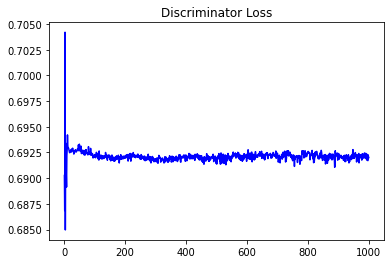

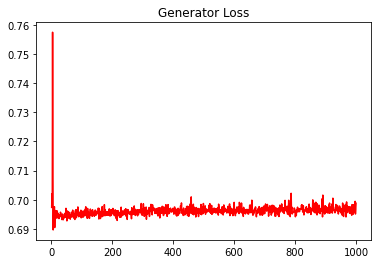

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2712174261073026


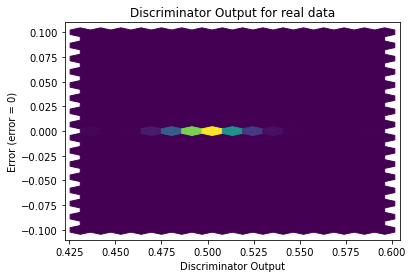

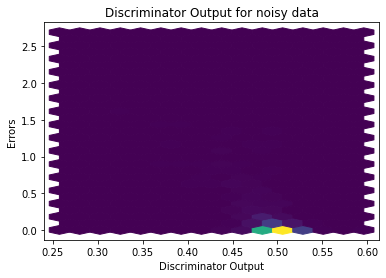

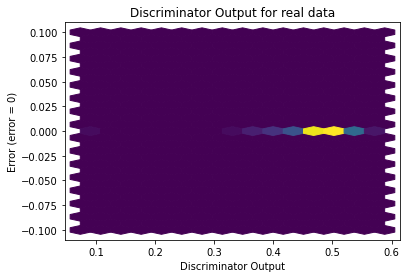

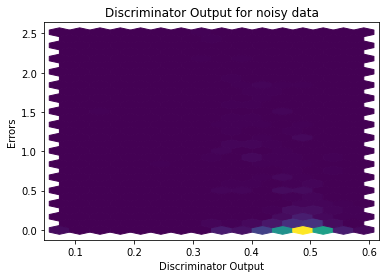

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


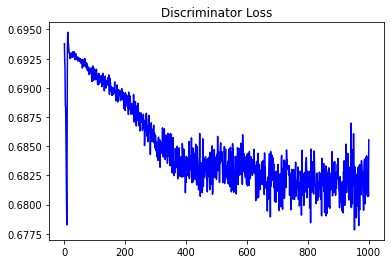

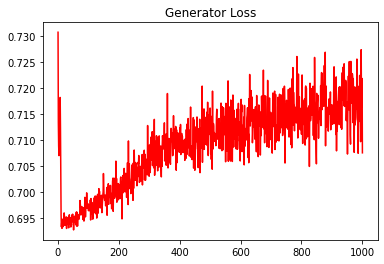

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13214385431191797


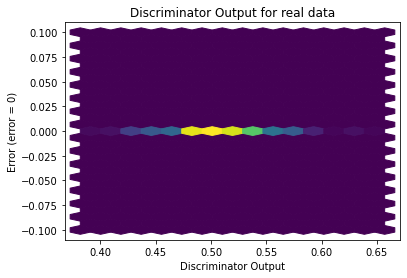

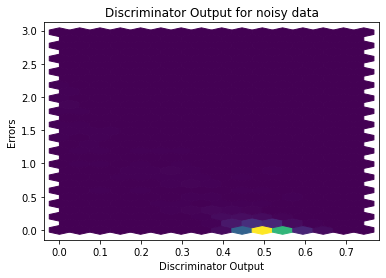

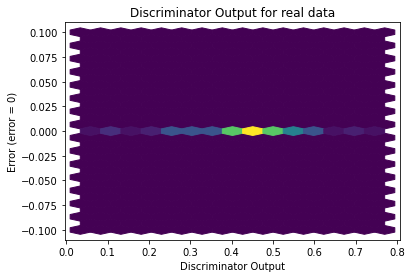

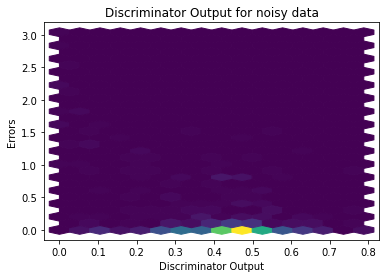

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4012]], requires_grad=True)
